In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [61]:
df=pd.read_csv('data_cardiovascular_risk.csv')

In [62]:
df.shape

(3390, 17)

In [63]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## Drop the insignificant column

In [65]:
# id column is insignificant because the serial number exists
df.drop(columns=['id'],inplace=True)

In [66]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Check for duplicates

In [67]:
df.duplicated().sum()

0

## Check and handle the null values

In [68]:
df.isnull().sum()/len(df)*100

age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [69]:
df.dtypes

age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [70]:
df.fillna(df.median(), inplace=True)

In [71]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Handling outliers

In [72]:
num_cols=[]
for i in df:
    if df[i].dtype!=object and df[i].nunique()>5:
        num_cols.append(i)

num_cols

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

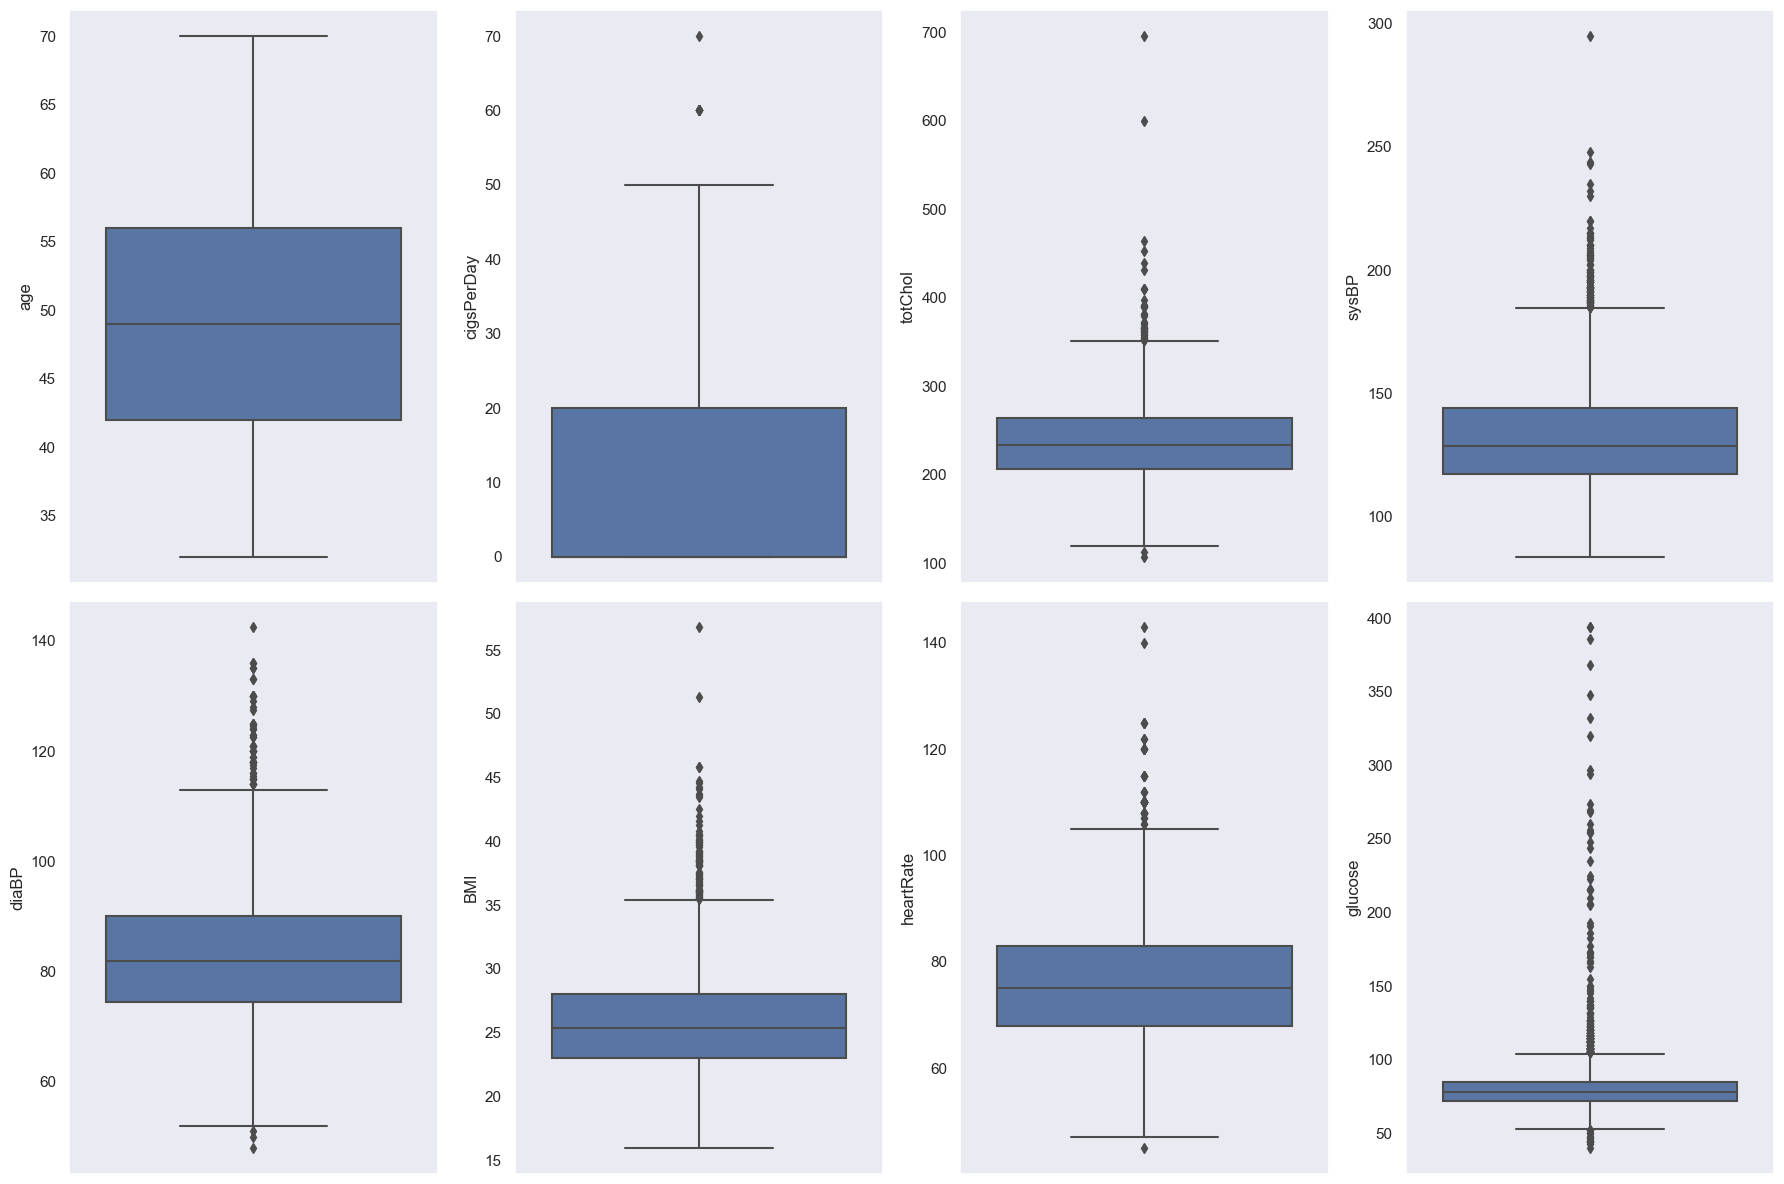

In [73]:
f,a=plt.subplots(2,4,figsize=(18,12),dpi=100)
ind=0

for i in range(2):
    for j in range(4):
        sns.boxplot(y=df[num_cols[ind]],ax=a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

In [74]:
def out_cap(col):
    q3=df[col].quantile(0.75)
    q1=df[col].quantile(0.25)
    
    iqr=q3-q1
    
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    
    df[col].clip(lower,upper,inplace=True)

In [75]:
for i in num_cols:
    out_cap(i)

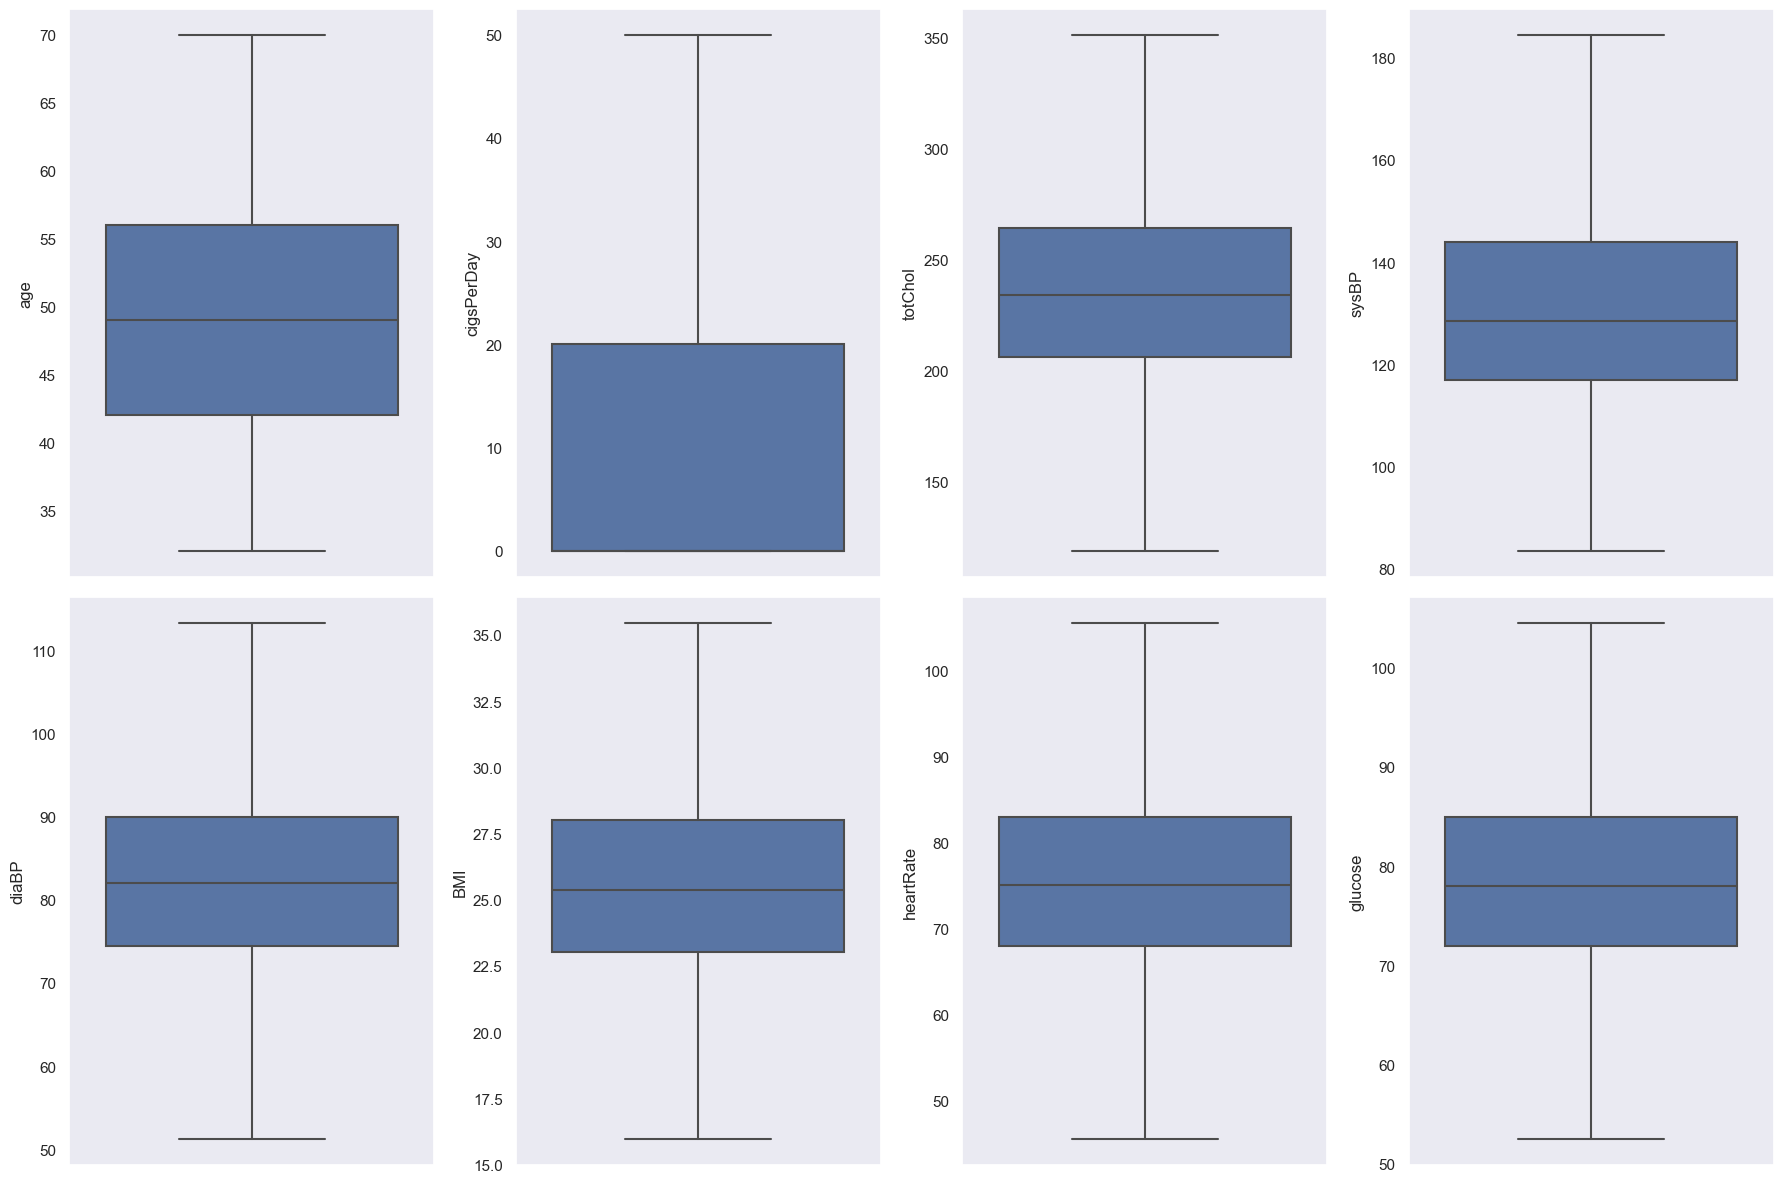

In [76]:
f,a=plt.subplots(2,4,figsize=(18,12),dpi=100)
ind=0

for i in range(2):
    for j in range(4):
        sns.boxplot(y=df[num_cols[ind]],ax=a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

## One Hot Encoding

In [77]:
df = pd.get_dummies(df)
df.head(5)   

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,1,0,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1


In [78]:
df.dtypes

age                  int64
education          float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
sex_F                uint8
sex_M                uint8
is_smoking_NO        uint8
is_smoking_YES       uint8
dtype: object

## Feature Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler() 
n_df = scaler.fit_transform(df)
print(n_df)

[[0.84210526 0.33333333 0.06       ... 0.         0.         1.        ]
 [0.10526316 1.         0.         ... 1.         1.         0.        ]
 [0.36842105 0.         0.2        ... 0.         0.         1.        ]
 ...
 [0.31578947 0.66666667 0.06       ... 1.         0.         1.        ]
 [0.73684211 0.         0.         ... 1.         1.         0.        ]
 [0.57894737 0.66666667 0.         ... 0.         1.         0.        ]]


## Check the relationship of target variable with the features

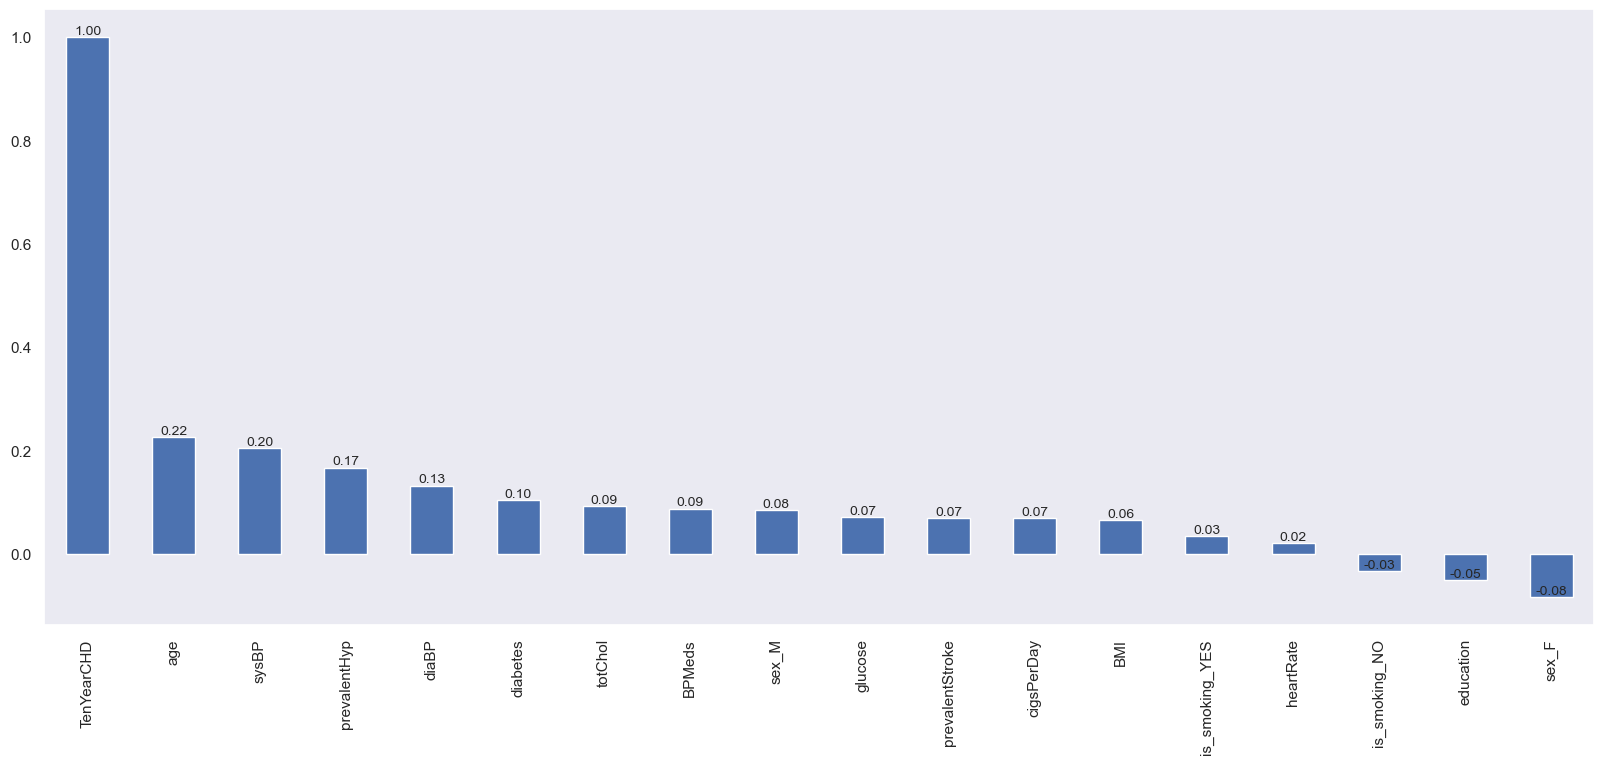

In [81]:
plt.figure(figsize=(20,8))
df.corr()['TenYearCHD'].sort_values(ascending=False).plot(kind='bar')

for i, value in enumerate(df.corr()['TenYearCHD'].sort_values(ascending=False)):
    plt.text(i, value , f'{value:.2f}', ha='center', va='bottom', fontsize=10)

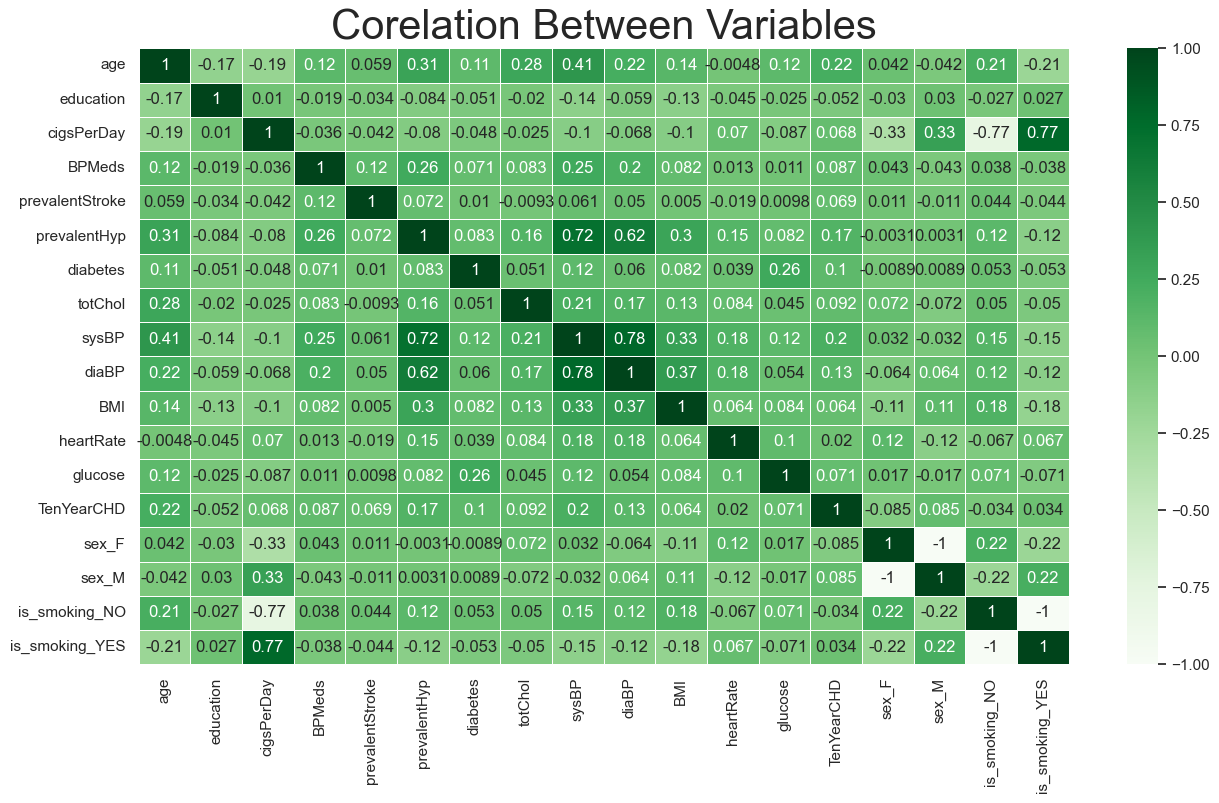

In [82]:
sns.set(style='dark')
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap='Greens')
plt.title('Corelation Between Variables',fontsize=30)
plt.show()

## Check for imbalanced dataset

In [83]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

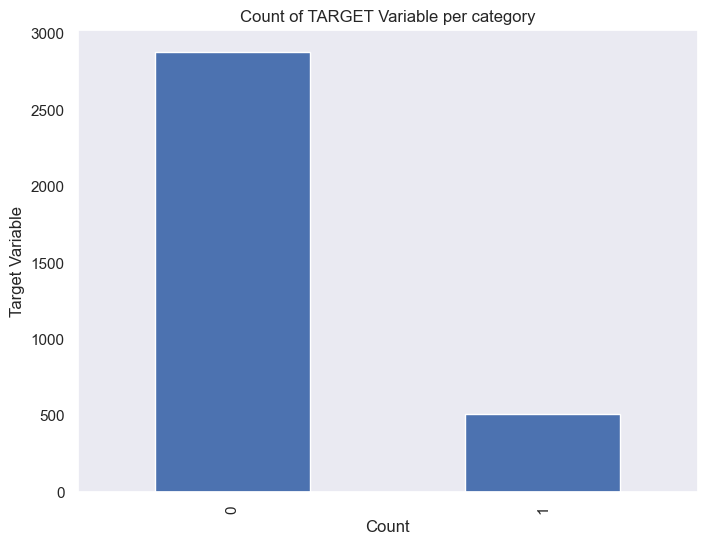

In [84]:
df['TenYearCHD'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category");

In [85]:
yes=511/(2879+511)*100
yes

15.073746312684367

In [86]:
no=2879/(2879+511)*100
no

84.92625368731564

In [87]:
import imblearn

In [88]:
x=df.drop(columns='TenYearCHD')
print(x.head())

   age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0         3.0     0.0                0             0   
1   36        4.0         0.0     0.0                0             1   
2   46        1.0        10.0     0.0                0             0   
3   50        1.0        20.0     0.0                0             1   
4   64        1.0        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  sex_F  sex_M  \
0         0    221.0  148.0   85.0  25.38       90.0     80.0      1      0   
1         0    212.0  168.0   98.0  29.77       72.0     75.0      0      1   
2         0    250.0  116.0   71.0  20.35       88.0     94.0      1      0   
3         0    233.0  158.0   88.0  28.26       68.0     94.0      0      1   
4         0    241.0  136.5   85.0  26.42       70.0     77.0      1      0   

   is_smoking_NO  is_smoking_YES  
0              0               1  
1              1      

In [89]:
y=df['TenYearCHD']
print(y.head())

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64


In [90]:
df.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,1,0,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1


In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x,y)

## Split the dataset into train and test

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [94]:
x_train.shape

(4606, 17)

In [95]:
x_test.shape

(1152, 17)

In [96]:
y_train.shape

(4606,)

In [97]:
y_test.shape

(1152,)

## Model Building

### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score, KFold

In [99]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [100]:
y_pred=lr.predict(x_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7378472222222222


In [102]:
print("Classification Report:")
print(classification_report(y_pred, y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       600
           1       0.72      0.75      0.73       552

    accuracy                           0.74      1152
   macro avg       0.74      0.74      0.74      1152
weighted avg       0.74      0.74      0.74      1152



In [103]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(lr, x, y, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", cv_score)
print("Mean accuracy:", cv_score.mean())

Cross-validation scores: [0.69791667 0.67013889 0.67447917 0.72632493 0.69331017]
Mean accuracy: 0.6924339644270682


### Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf=RandomForestClassifier(n_estimators=500,random_state=101)

In [106]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=101)

In [107]:
y_pred=rf.predict(x_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9105902777777778


In [109]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       576
           1       0.93      0.89      0.91       576

    accuracy                           0.91      1152
   macro avg       0.91      0.91      0.91      1152
weighted avg       0.91      0.91      0.91      1152



In [110]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(rf, x, y, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", cv_score)
print("Mean accuracy:", cv_score.mean())

Cross-validation scores: [0.92447917 0.92013889 0.92534722 0.90269331 0.91659427]
Mean accuracy: 0.9178505707597259


### XG Boost

In [111]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
y_pred = xgb.predict(x_test)

In [116]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       576
           1       0.90      0.87      0.89       576

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152



In [114]:
print(accuracy_score(y_test, y_pred))

0.8880208333333334


In [115]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(xgb, x, y, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", cv_score)
print("Mean accuracy:", cv_score.mean())

Cross-validation scores: [0.88541667 0.90190972 0.89930556 0.89661164 0.90443093]
Mean accuracy: 0.8975349032242494
